In [1]:
import numpy as np 
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append("..")
from Functions.UNSW_DF import *

x_train, x_test, y_train, y_test = DF_XY()

C:\Users\Sajepan\.conda\envs\MasterThesisGPU\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Sajepan\.conda\envs\MasterThesisGPU\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\Sajepan\.conda\envs\MasterThesisGPU\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


( 1 ) Reading Preprocessed CSV files..
	 Training dataset loaded..
	 Testing dataset loaded..

( 2 ) Loading done, splitting into X and Y..
	 ( 2.1 ) x_train Shape:  	 (175341, 53)
	 ( 2.2 ) y_train Shape:  	 (175341,)
	 ( 2.3 ) x_test Shape:  	 (82332, 53)
	 ( 2.4 ) y_test Shape:  	 (82332,)
( 3 ) Done!
PS! Import with: x_train, x_test, y_train, y_test = XY_import()


In [10]:
df = pd.read_csv("Analysis_SVM/SVM_results.csv")

In [3]:
df = df.drop(["C", "gamma", "runtime(s)"], axis=1)

In [4]:
columns = ["train_acc", "test_acc", "F1", "precision", "recall"]

for col in columns:
    df[col] *= 100


In [5]:
df

,kernel,train_acc,test_acc,F1,precision,recall
0,rbf,93.775,81.579,85.601,75.137,99.4500
1,rbf,94.862,83.418,86.552,78.179,96.9200
2,rbf,94.931,83.678,86.734,78.484,96.9070
3,rbf,94.802,83.264,86.431,78.060,96.8140
4,rbf,95.169,84.037,86.959,79.027,96.6620
5,poly,94.584,83.492,86.742,77.752,98.0830
6,poly,94.401,83.247,86.637,77.239,98.6410
7,poly,94.518,83.424,86.724,77.567,98.3340
8,poly,94.787,83.050,86.189,78.160,96.0557
9,linear,93.568,81.444,85.534,74.930,99.6330


In [6]:
df = pd.melt(df, id_vars="kernel", 
             var_name="metric", 
             value_name="score")

In [7]:
df

,kernel,metric,score
0,rbf,train_acc,93.7750
1,rbf,train_acc,94.8620
2,rbf,train_acc,94.9310
3,rbf,train_acc,94.8020
4,rbf,train_acc,95.1690
...,...,...,...
60,poly,recall,96.0557
61,linear,recall,99.6330
62,linear,recall,99.6000
63,sigmoid,recall,81.5620


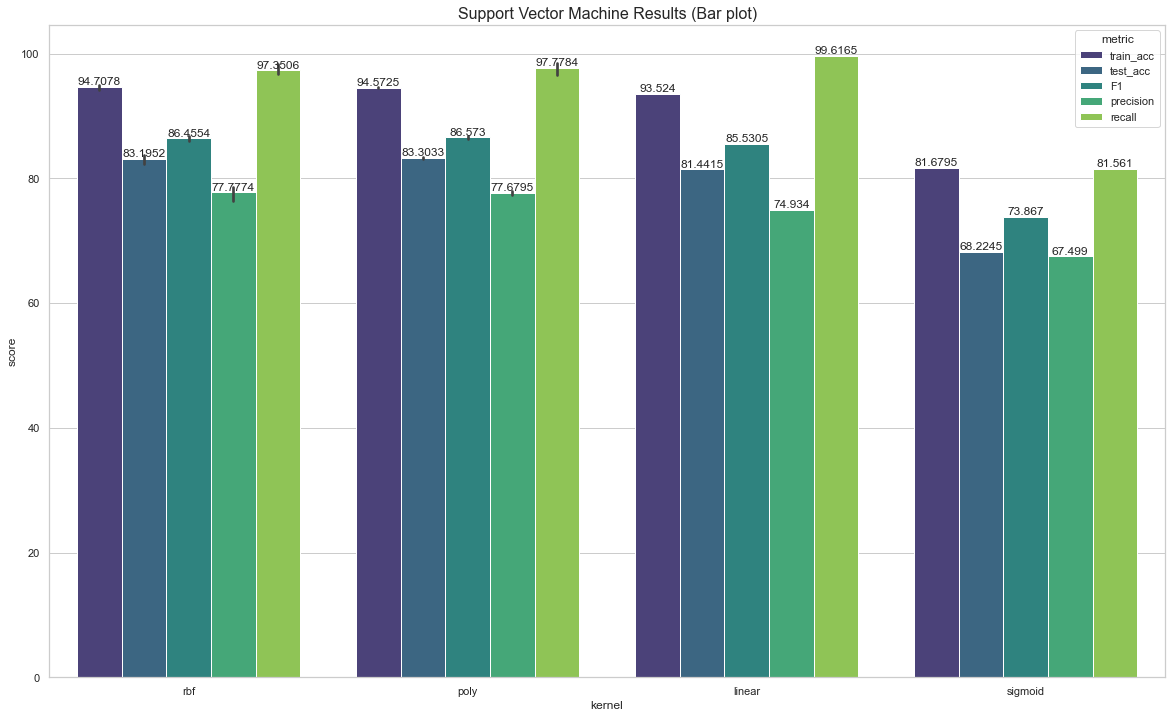

In [9]:
sns.set(rc={"figure.figsize":(20, 12), 'axes.facecolor':'white',})
sns.set_style("whitegrid")
ax = sns.barplot(x='kernel', y='score', hue='metric', data=df, palette="viridis")
plt.title("Support Vector Machine Results (Bar plot)", size=16)

for container in ax.containers:
    ax.bar_label(container)
ax.figure.savefig("Analysis_SVM/SVM_Results.png", dpi=400)

## Distplot

In [14]:
df_dist = pd.read_csv("Analysis_SVM/SVM_results.csv")
df_dist = df_dist.drop(["C", "gamma", "runtime(s)"], axis=1)
columns = ["train_acc", "test_acc", "F1", "precision", "recall"]
for col in columns:
    df_dist[col] *= 100


C:\Users\Sajepan\.conda\envs\MasterThesisGPU\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sajepan\.conda\envs\MasterThesisGPU\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sajepan\.conda\envs\MasterThesisGPU\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

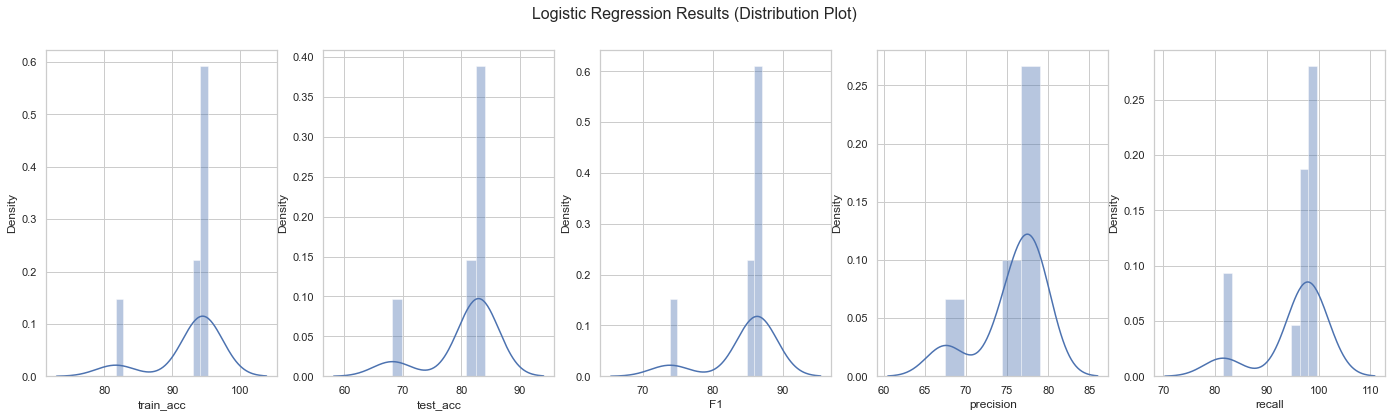

In [17]:
sns.set(rc={"figure.figsize":(24, 6), 'axes.facecolor':'white',})
sns.set_style("whitegrid")

fig, axs = plt.subplots(ncols=5, nrows=1)
ax=sns.distplot(df_dist["train_acc"], ax=axs[0])
ax=sns.distplot(df_dist['test_acc'], ax=axs[1])
ax=sns.distplot(df_dist['F1'], ax=axs[2])
ax=sns.distplot(df_dist['precision'], ax=axs[3])
ax=sns.distplot(df_dist['recall'], ax=axs[4])
fig.suptitle("Logistic Regression Results (Distribution Plot)", size=16)

ax.figure.savefig("Analysis_SVM/SVM_Distplot.png", dpi=400)

### Jointplot

In [18]:
df_reg = pd.read_csv("Analysis_SVM/SVM_results.csv")
df_reg = df_reg.drop(["C", "gamma", "runtime(s)"], axis=1)
columns = ["train_acc", "test_acc", "F1", "precision", "recall"]
for col in columns:
    df_reg[col] *= 100


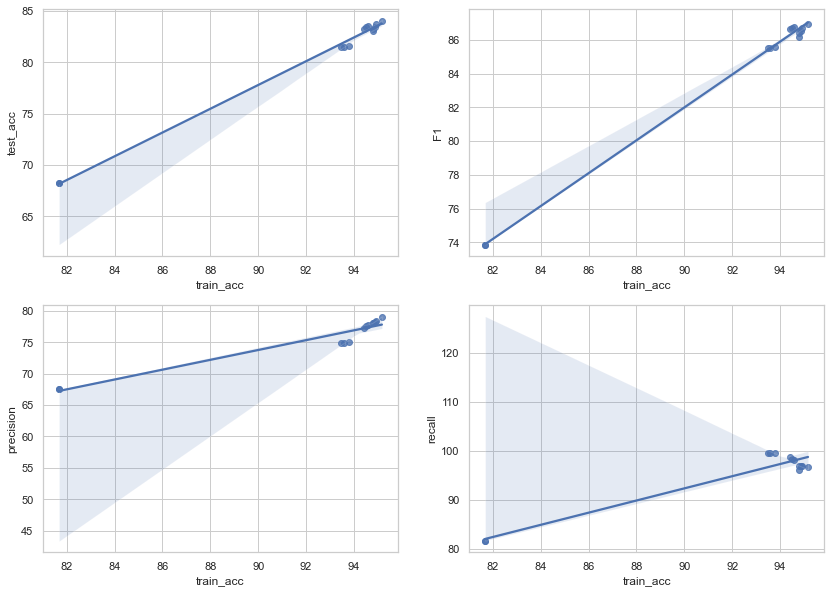

In [19]:
sns.set(rc={"figure.figsize":(14, 10), 'axes.facecolor':'white',})
sns.set_style("whitegrid")

fig, axs = plt.subplots(ncols=2, nrows=2)
ax=sns.regplot(x='train_acc', y='test_acc', data=df_reg, ax=axs[0, 0])
ax=sns.regplot(x='train_acc', y='F1', data=df_reg, ax=axs[0,1])
ax=sns.regplot(x='train_acc', y='precision', data=df_reg, ax=axs[1,0])
ax=sns.regplot(x='train_acc', y='recall', data=df_reg, ax=axs[1, 1])

#fig.suptitle("Logistic Regression Results (Regression Plot)", size=16)
ax.figure.savefig("Analysis_SVM/SVM_regplot.png", dpi=400)